# FUM Computer Vision - Session 01

Visit the [course repository on Github](https://github.com/alifarrokh/FUM-ComputerVision) to get access to other sessions.

### Load Required Packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Download Images

In [ ]:
!wget -q "https://picsum.photos/id/103/300" -O img1.jpg
!wget -q "https://picsum.photos/id/106/300" -O img2.jpg
!wget -q "https://picsum.photos/id/1069/300" -O img3.jpg

In [ ]:
!ls *.jpg

img1.jpg  img2.jpg  img3.jpg


<class 'numpy.ndarray'>
(300, 300, 3)


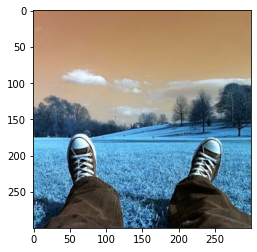

In [ ]:
img1 = cv2.imread('img1.jpg')
print(type(img1))
print(img1.shape)
plt.imshow(img1)
plt.show()

### Utils

In [ ]:
def imshow(*args, figsize=10, to_rgb=True, title=None, fontsize=12):
    if isinstance(figsize, int):
        figsize = (figsize, figsize)
    images = args[0] if type(args[0]) is list else list(args)
    if to_rgb:
        images = list(map(lambda x: cv2.cvtColor(x, cv2.COLOR_BGR2RGB), images))
    if title is not None:
        assert len(title) == len(images), "Please provide a title for each image."
    plt.figure(figsize=figsize)
    for i in range(1, len(images)+1):
        plt.subplot(1, len(images), i)
        if title is not None:
            plt.title(title[i-1], fontsize=fontsize)
        plt.imshow(images[i-1])
        plt.axis('off')

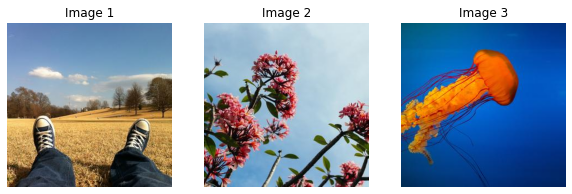

In [ ]:
img1 = cv2.imread('img1.jpg')
img2 = cv2.imread('img2.jpg')
img3 = cv2.imread('img3.jpg')
imshow(img1, img2, img3, title=['Image 1', 'Image 2', 'Image 3'])

### Loading the Images

- Use `cv2.imread?` to get information about a specific method.
- cv2.imread returns a numpy array.
- cv2 uses bgr channel ordering by default.


```
image = cv2.imread(img, color_flag) -> ndarray

Color Flags:
cv2.IMREAD_COLOR       # default
cv2.IMREAD_GRAYSCALE
cv2.IMREAD_UNCHANGED
```

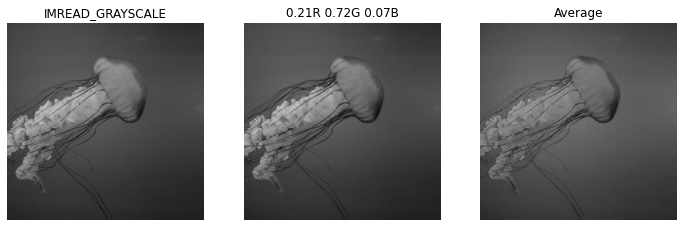

In [ ]:
img1 = cv2.imread('img3.jpg', cv2.IMREAD_GRAYSCALE)

temp = cv2.imread('img3.jpg').astype('float32')
b, g, r = cv2.split(temp)

img2 = (0.21*r + 0.72*g + 0.07*b).astype('uint8')
img3 = ((r + g + b) / 3.0).astype('uint8')

imshow(img1, img2, img3, title=['IMREAD_GRAYSCALE', '0.21R 0.72G 0.07B', 'Average'], figsize=12)

Image: (300, 300, 3)
Channnel: (300, 300)


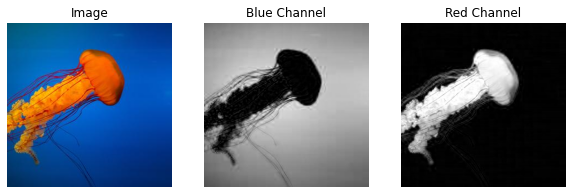

In [ ]:
img = cv2.imread('img3.jpg')
b, g, r = cv2.split(img)

print(f'Image: {img.shape}')
print(f'Channnel: {b.shape}')

imshow(img, b, r, title=['Image', 'Blue Channel', 'Red Channel'])

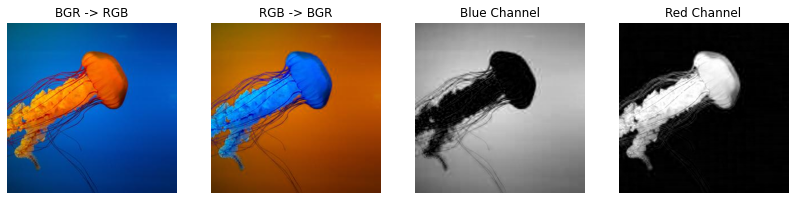

In [ ]:
img_bgr = cv2.imread('img3.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r, g, b = cv2.split(img_rgb)
titles=['BGR -> RGB', 'RGB -> BGR', 'Blue Channel', 'Red Channel']
imshow(img_bgr, img_rgb, b, r, title=titles, figsize=14)

### Using Array Slicing

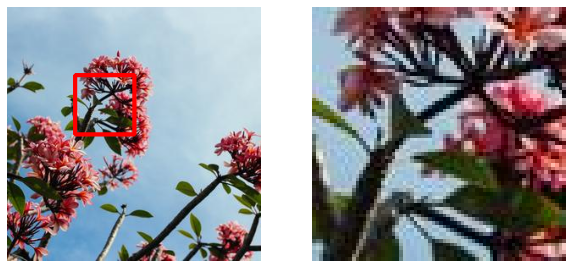

In [ ]:
img = cv2.imread('img2.jpg')

start = (80, 80)
end = (150, 150)

img2 = img.copy()[start[0]:end[0], start[1]:end[1]]
img = cv2.rectangle(img, start, end, (0, 0, 255), 3)

imshow(img, img2)

### Intensity Quantization

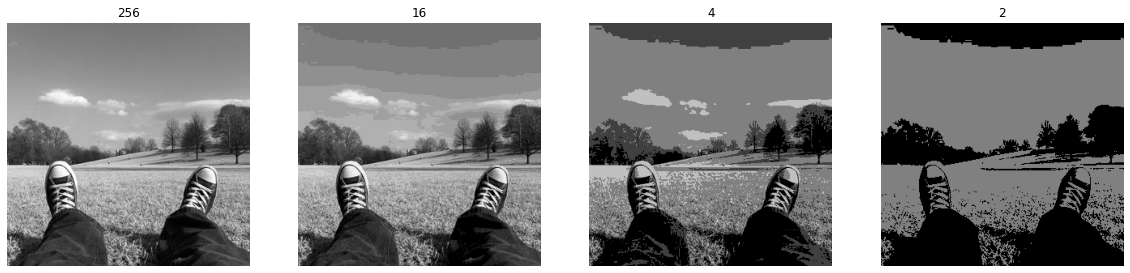

In [ ]:
def quantize_simulation(image, n_bits):
    coeff = 2**8 // 2**n_bits
    return (image // coeff) * coeff


img = cv2.imread('img1.jpg', cv2.IMREAD_GRAYSCALE)
img4bit = quantize_simulation(img, 4)
img2bit = quantize_simulation(img, 2)
img1bit = quantize_simulation(img, 1)

titles = [
    len(np.unique(img)),
    len(np.unique(img4bit)),
    len(np.unique(img2bit)),
    len(np.unique(img1bit)),
]
imshow(img, img4bit, img2bit, img1bit, title=titles, figsize=20)

### Interpolation

Interpolation Modes:
```
cv2.INTER_CUBIC
cv2.INTER_LINEAR
```

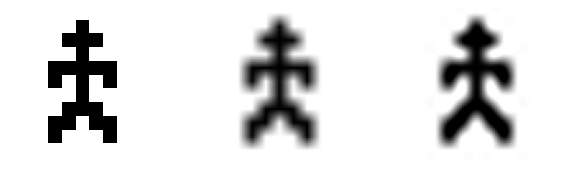

In [ ]:
!wget -q "https://i.postimg.cc/sX4rzCbf/man3.png" -O interpolation.png

img = cv2.imread('interpolation.png', cv2.IMREAD_GRAYSCALE)

img100linear = cv2.resize(img, (100, 100), interpolation=cv2.INTER_LINEAR)
img100cubic = cv2.resize(img, (100, 100), interpolation=cv2.INTER_CUBIC)

imshow(img, img100linear, img100cubic)

### Pixel Arithmetic

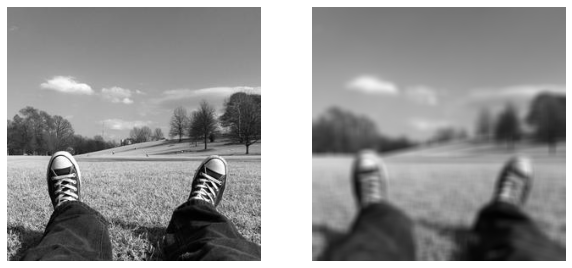

In [ ]:
# Average
img = cv2.imread('img1.jpg', cv2.IMREAD_GRAYSCALE)
avg = np.zeros_like(img, dtype='uint8')

kernel_size = 5
size = kernel_size - 1

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        x_start = max(i-size, 0)
        x_end = min(i+size, img.shape[0]-1)
        y_start = max(j-size, 0)
        y_end = min(j+size, img.shape[1]-1)
        
        value = img[x_start:x_end+1, y_start:y_end+1].mean()
        avg[i, j] = value

imshow(img, avg)

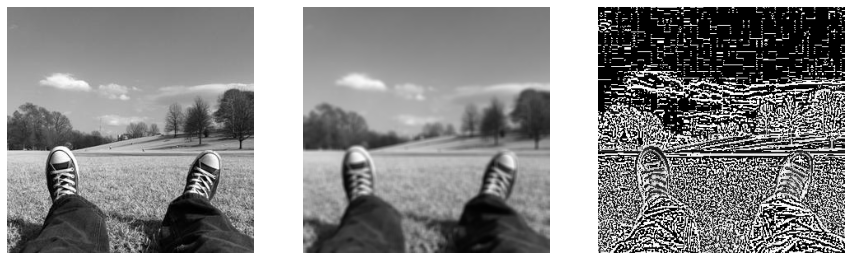

In [ ]:
# Subtraction
img = cv2.imread('img1.jpg', cv2.IMREAD_GRAYSCALE)
blur = cv2.GaussianBlur(img, (5, 5), 3)
diff = img - blur
imshow(img, blur, diff, figsize=15)

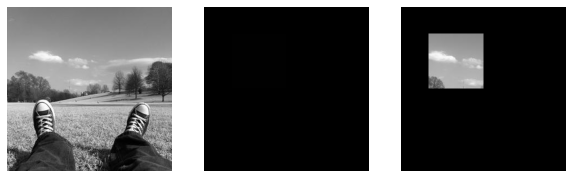

In [ ]:
# Masking
img = cv2.imread('img1.jpg', cv2.IMREAD_GRAYSCALE)
mask = np.zeros_like(img, dtype='uint8')
mask[50:150, 50:150] = 1
img_masked = img * mask
imshow(img, mask, img_masked)

# Affine Transformations 

An Affine Transformation can be expressed in the form of a ***matrix multiplication*** (linear transformation) followed by a ***vector addition*** (translation). The key property of this transformation is that **parallel lines remain parallel** after the transformation.This transformation can be formulated as below:

\begin{equation}
\begin{bmatrix}
u \\ v
\end{bmatrix}
=
A_{2 \times 2}
\
\begin{bmatrix}
x \\ y
\end{bmatrix}
+
B_{2 \times 1}
\\
\end{equation}
Or equivalently:
\begin{equation}
\\
\begin{bmatrix}
u \\ v
\end{bmatrix}
=
\begin{bmatrix}
A_{2 \times 2} & B_{2 \times 1}
\end{bmatrix} \ _{2 \times 3}
\ \
\begin{bmatrix}
u \\ v \\ 1
\end{bmatrix}
\end{equation}

Where $ [x \ y] $ is the coordinate of any arbitary point in the source image and $ [u \ v] $ is the corresponding coordinate in the final image.



In [ ]:
def scaling(cx, cy):
    return np.array([
        [cx, 0,  0],
        [0,  cy, 0],
        [0,  0,  1]
    ], dtype='float64')

In [ ]:
def rotation(theta, cx, cy):
    alpha = np.cos(theta)
    beta = np.sin(theta)
    return np.array([
        [alpha, beta,  (1-alpha)*cx - beta*cy],
        [-beta, alpha, beta*cx + (1-alpha)*cy],
        [0,     0,     1]
    ], dtype='float64')

In [ ]:
def translation(tx, ty):
    return np.array([
        [1,  0,  tx],
        [0,  1,  ty],
        [0,  0,  1]
    ], dtype='float64')

In [ ]:
def shear(sv, sh):
    return np.array([
        [1,  sh, 0],
        [sv, 1,  0],
        [0,  0,  1]
    ], dtype='float64')

### Using `cv2.warpAffine()`

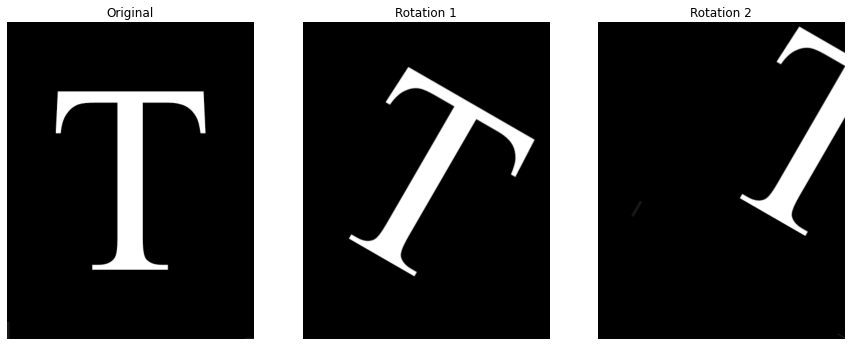

In [ ]:
img = cv2.imread('Fig0236(a)(letter_T).tif', cv2.IMREAD_GRAYSCALE)
height, width = img.shape
final_size = (width, height)

m_rot1 = rotation(-np.pi/6, cx=width/2, cy=height/2)[:2, :]
m_rot2 = rotation(-np.pi/6, cx=width, cy=height)[:2, :]

img_rot1 = cv2.warpAffine(img, m_rot1, final_size)
img_rot2 = cv2.warpAffine(img, m_rot2, final_size)

title= ['Original', 'Rotation 1', 'Rotation 2']
imshow(img, img_rot1, img_rot2, title=title, figsize=15)

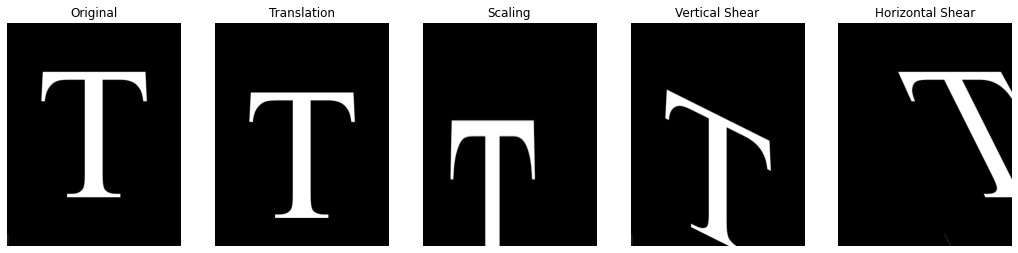

In [ ]:
img = cv2.imread('Fig0236(a)(letter_T).tif', cv2.IMREAD_GRAYSCALE)
height, width = img.shape
final_size = (width, height)

m_translation = translation(0, 50)[:2, :]
m_scaling = scaling(0.8, 2)[:2, :]
m_shearv = shear(0.5, 0)[:2, :]
m_shearh = shear(0, 0.5)[:2, :]

img_translation = cv2.warpAffine(img, m_translation, final_size)
img_scaling = cv2.warpAffine(img, m_scaling, final_size)
img_shearv = cv2.warpAffine(img, m_shearv, final_size)
img_shearh = cv2.warpAffine(img, m_shearh, final_size)

title=['Original', 'Translation', 'Scaling', 'Vertical Shear', 'Horizontal Shear']
imshow(img, img_translation, img_scaling, img_shearv, img_shearh, title=title, figsize=18)

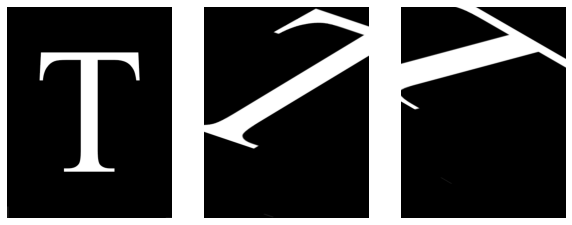

In [ ]:
img = cv2.imread('Fig0236(a)(letter_T).tif', cv2.IMREAD_GRAYSCALE)
height, width = img.shape
final_size = (width, height)

m_translation = translation(-70, -70)
m_scaling = scaling(2, 1)
m_rotation = rotation(- np.pi/6, cx=width/2, cy=height/2)
m_shear = shear(0, -0.5)

m1 = (m_shear @ m_translation @ m_scaling @ m_rotation)[:2, :]
m2 = (m_rotation @ m_translation @ m_scaling @ m_shear)[:2, :]

img1 = cv2.warpAffine(img, m1, final_size)
img2 = cv2.warpAffine(img, m2, final_size)

imshow(img, img1, img2)

### Implementation - Direct Transformation

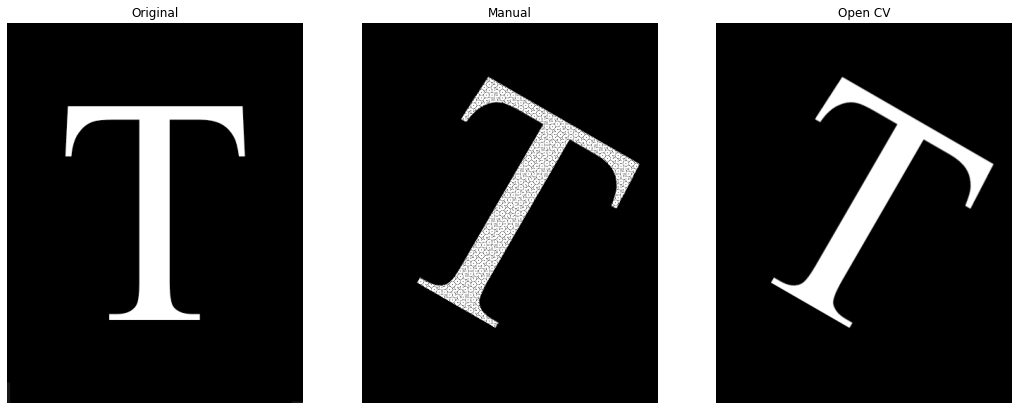

In [ ]:
img = cv2.imread('Fig0236(a)(letter_T).tif', cv2.IMREAD_GRAYSCALE)
m = rotation(-np.pi/6, cx=width/2, cy=height/2)[:2, :]

height, width = img.shape
final_size = (width, height)

src_y, src_x = np.indices((height, width))
src_points = np.stack((src_x.ravel(), src_y.ravel(), np.ones(src_y.size))).astype('int64')
dest_points = np.round(m @ src_points).astype(int)

# Filter the points
lower_bound_condition = np.logical_and(dest_points[0,:] >= 0, dest_points[1,:] >= 0)
upper_bound_condition = np.logical_and(dest_points[0,:] < width, dest_points[1,:] < height)
condition = np.logical_and(lower_bound_condition, upper_bound_condition)
src_points = src_points[:2, condition]
dest_points = dest_points[:, condition]

# Fill the output image
out = np.zeros_like(img)
out[dest_points[1], dest_points[0]] = img[src_points[1], src_points[0]]

# Use cv2
out_cv2 = cv2.warpAffine(img, m, final_size)

imshow(img, out, out_cv2, title=['Original', 'Manual', 'Open CV'], figsize=18)

### Implementation - Inverse Transformation

Note that $ | \ A_{2 \times 2} \ | $ is usually non-zero, therefore, $ \ A_{2 \times 2} $ is usually invertible. As a result:

\begin{equation}
\begin{bmatrix}
x \\ y
\end{bmatrix}
=
A^{-1}
\
(
\begin{bmatrix}
u \\ v
\end{bmatrix}
-
B)
\\
\end{equation}

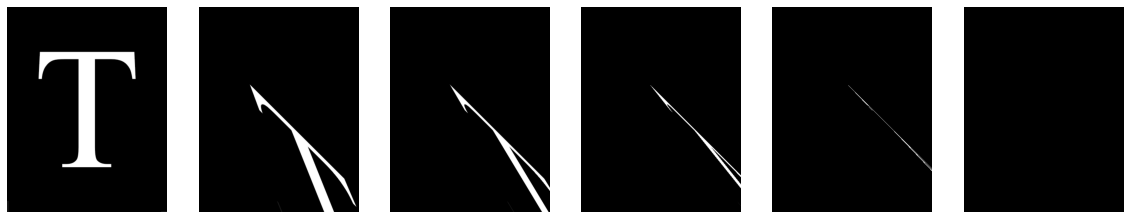

In [ ]:
img = cv2.imread('Fig0236(a)(letter_T).tif', cv2.IMREAD_GRAYSCALE)
height, width = img.shape
final_size = (width, height)

images = []

for x in [0.4, 0.6, 0.8, 0.95, 1]:
    m = np.array([
        [1, x, 0],
        [1, 1, 0]
    ], dtype='float64')
    out = cv2.warpAffine(img, m, final_size)
    images.append(out)

imshow(img, *images, figsize=20)

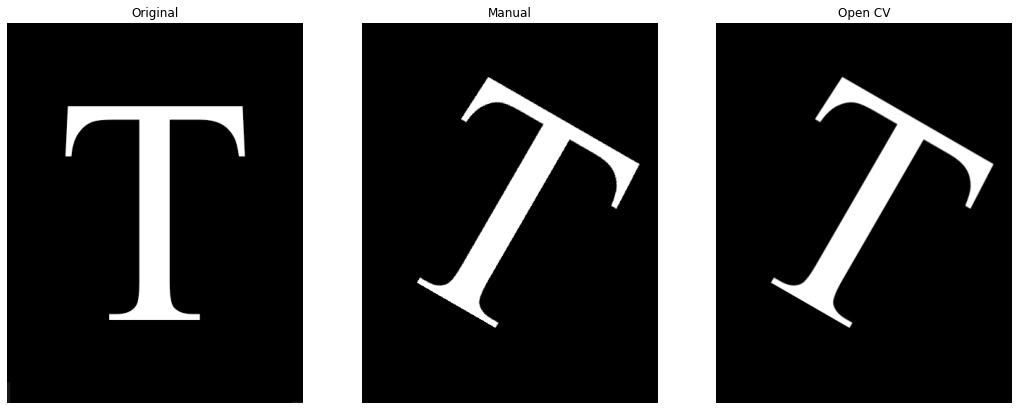

In [ ]:
img = cv2.imread('Fig0236(a)(letter_T).tif', cv2.IMREAD_GRAYSCALE)
m = rotation(-np.pi/6, cx=width/2, cy=height/2)[:2, :]
height, width = img.shape
final_size = (width, height)

# Split m
A = m[:2, :2]
B = m[:2, 2]
A_inv = np.linalg.inv(A)

# Find indices
dest_y, dest_x = np.indices((height, width))
dest_points = np.stack((dest_x.ravel(), dest_y.ravel())).astype('int64')
src_points = A_inv @ (dest_points - B.reshape(2, 1))
src_points = np.round(src_points).astype('int64')

# Filter the points
# Filter the points
lower_bound_condition = np.logical_and(src_points[0,:] >= 0, src_points[1,:] >= 0)
upper_bound_condition = np.logical_and(src_points[0,:] < width, src_points[1,:] < height)
condition = np.logical_and(lower_bound_condition, upper_bound_condition)
src_points = src_points[:, condition]
dest_points = dest_points[:, condition]

# Fill the ouput image
out = np.zeros_like(img)
out[dest_points[1], dest_points[0]] = img[src_points[1], src_points[0]]

# Use cv2
out_cv2 = cv2.warpAffine(img, m, final_size)

imshow(img, out, out_cv2, title=['Original', 'Manual', 'Open CV'], figsize=18)

### Find A Specefic Transformation Matrix

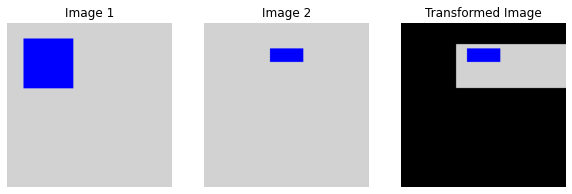

In [ ]:
img1 = np.full((500, 500, 3), 210, dtype='uint8')
img2 = np.full((500, 500, 3), 210, dtype='uint8')

img1 = cv2.rectangle(img1, (50, 50), (200, 200), (255, 0, 0), -1)
img2 = cv2.rectangle(img2, (200, 80), (300, 120), (255, 0, 0), -1)

# Corresponding points
pts1 = np.array([[50, 50], [200, 200], [200, 50]], dtype='float32')
pts2 = np.array([[200, 80], [300, 120], [300, 80]], dtype='float32')

# Find the transformation matrix
M = cv2.getAffineTransform(pts1, pts2)
out = cv2.warpAffine(img1, M, (img1.shape[1], img1.shape[0]))

imshow(img1, img2, out, title=['Image 1', 'Image 2', 'Transformed Image'])

# Perspective Transform


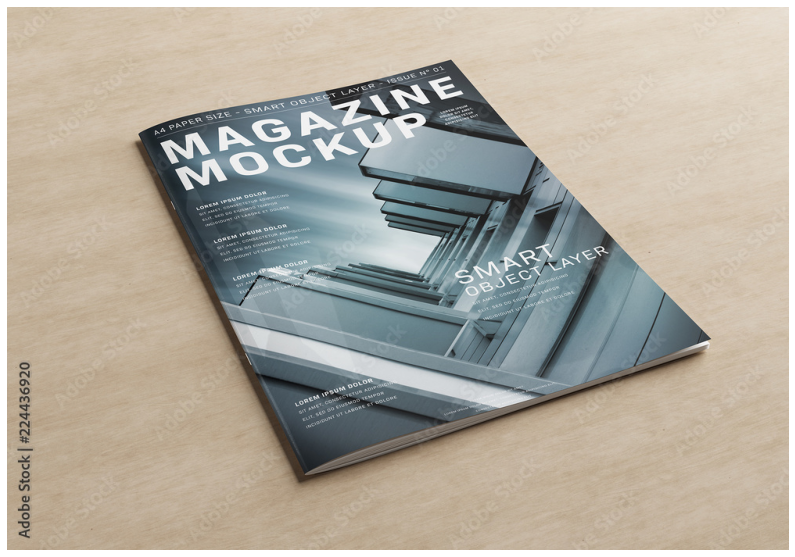

In [ ]:
imshow(cv2.imread('magazine.jpg'), figsize=14)

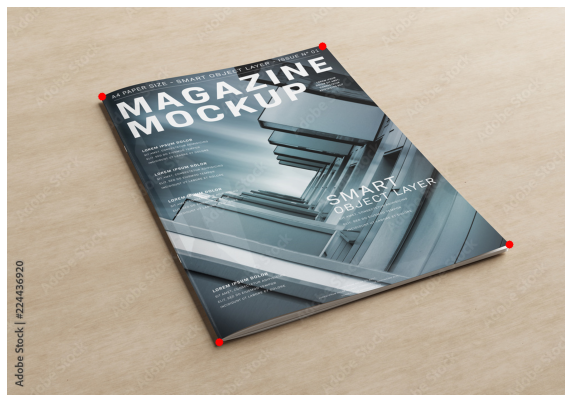

In [ ]:
corners = np.array([
    [170, 160],
    [565, 70],
    [380, 600],
    [900, 425]
], dtype='float32')

img = cv2.imread('magazine.jpg')
for x, y in corners:
    x, y = int(x), int(y)
    img = cv2.circle(img, (x,y), radius=7, color=(0, 0, 255), thickness=-1)

imshow(img)

Transformation matrix shape: (3, 3)


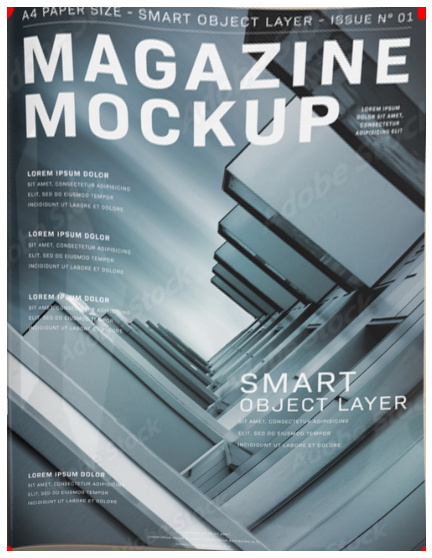

In [ ]:
# Define final width and height
w = 500
h = 650

# Define Corresponding points
corners2 = np.array([
    [0, 0],
    [w, 0],
    [0, h],
    [w, h]
], dtype='float32')

# Find transformation matrix
m = cv2.getPerspectiveTransform(corners, corners2)
print('Transformation matrix shape:', m.shape)

# Transform the image
result = cv2.warpPerspective(img, m, (w, h))

imshow(result)